<div class='alert alert-success'>
    <h1 align="center">Chapter 9: Dimensionality Reduction</h1> 
    <h3 align="center">Machine Learning Course (Fall 2018)</h3>
    <h5 align="center">Seyed Naser RAZAVI <a href='http://www.snrazavi.ir/ml-2018/'>ML2018</a></h5>
</div>

## Objectives

- Dimensionality reduction 
- Principal Component Analysis (PCA)
 - Dimensionality reduction
 - Data Compression
 - Visualization

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact

from sklearn.decomposition import PCA

# use seaborn plotting style defaults
import seaborn as sns; sns.set()

from plot_utils import *

In [2]:
plt.rcParams['figure.figsize'] = (10, 8)

## Principal Component Analysis (PCA)

For a complete introduction, please see [Dimensionality Reduction](http://www.snrazavi.ir/wp-content/uploads/2017/10/13-DimensionalityReduction-2016.pdf)

Here we'll explore **Principal Component Analysis**, which is an extremely useful linear dimensionality reduction technique.

The goal is to reduce the size (dimensionality) of a dataset while capturing most of its information. 

There are many reason why dimensionality reduction can be useful: 
- It can reduce the **computational cost** when running learning algorithms,
- decrease the **storage space**, and 
- may help with the so-called "curse of dimensionality," 

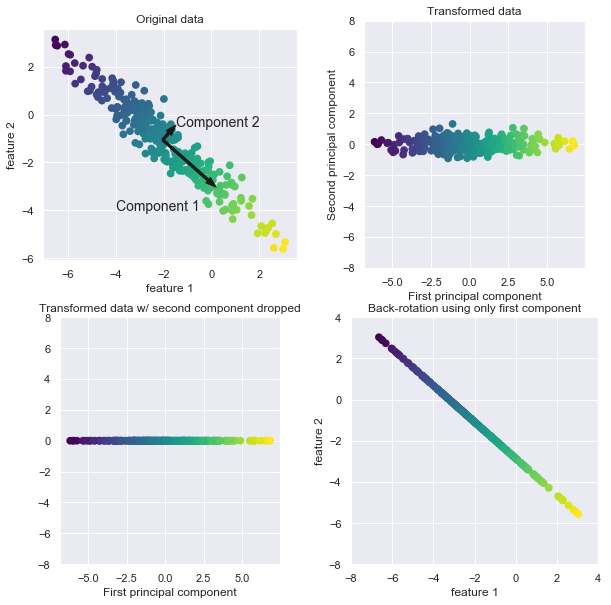

In [3]:
plot_pca_illustration()

### Example use of PCA
It's easiest to visualize by looking at a two-dimensional dataset:

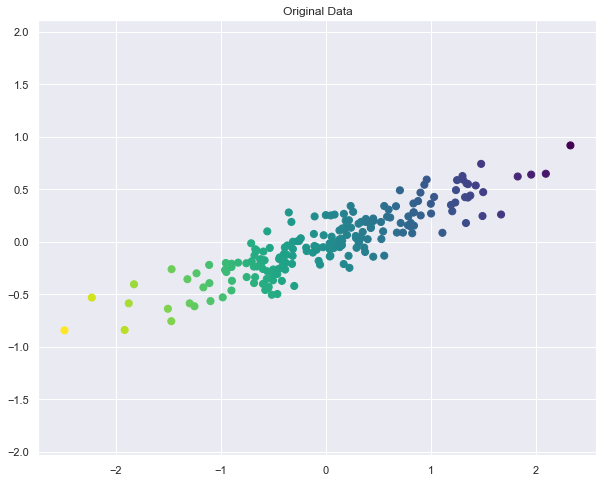

In [4]:
# create random data from normal distribution
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T

# plot data
c = PCA().fit_transform(X)[:, 0]  # colors
plt.scatter(X[:, 0], X[:, 1], s=50, c=c, cmap='viridis')
plt.title('Original Data')
plt.axis('equal')
plt.show()

Now, our goal is:
* to find **Principal Axes** in the data, and 
* explain how **important** those axes are in describing the data distribution

In [5]:
pca = PCA(n_components=2).fit(X)

In [6]:
U = pca.components_          # Principal Components (directions)
S = pca.explained_variance_  # importance of ecah direction (variances)

print("1st Principal Component: {} ({:.2f})".format(U[0], S[0]))
print("2nd Principal Component: {} ({:.2f})".format(U[1], S[1]))

1st Principal Component: [-0.94446029 -0.32862557] (0.76)
2nd Principal Component: [-0.32862557  0.94446029] (0.02)


### Properties

Matrix `U` is an **orthogonal matrix**:
* An orthogonal matrix is a square matrix whose columns and rows are **orthogonal unit vectors**.

In [7]:
print(np.linalg.norm(U[0]))
print(np.linalg.norm(U[1]))

1.0
1.0


In [8]:
print(np.dot(U[0], U[1]))

0.0


To see what these numbers mean, let's view them as vectors plotted on top of the data:

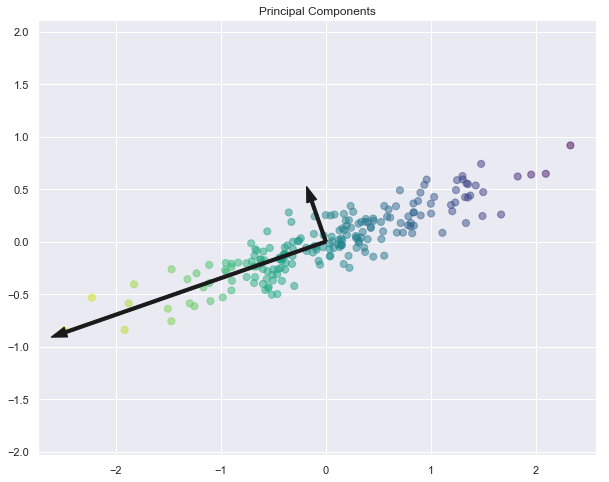

In [9]:
# plot data
plt.scatter(X[:, 0], X[:, 1], s=50, c=c, cmap='viridis', alpha=0.5)

plt.arrow(0, 0, 3 * np.sqrt(S[0]) * U[0, 0], 3 * np.sqrt(S[0]) * U[0, 1], width=.03, head_width=.1, color='k')
plt.arrow(0, 0, 3 * np.sqrt(S[1]) * U[1, 0], 3 * np.sqrt(S[1]) * U[1, 1], width=.03, head_width=.1, color='k')

plt.title("Principal Components")
plt.axis('equal')
plt.show()

Notice that one vector is longer than the other, which means that direction in the data is somehow more **important** than the other direction.

In other word, the second principal component could be **completely ignored** without much loss of information! Let's see what our data look like if we only keep 95% of the variance:

In [10]:
pca = PCA(0.95) # keep 95% of variance
X_proj = pca.fit_transform(X)

print(X.shape)
print(X_proj.shape)

(200, 2)
(200, 1)


By specifying that we want to throw away 5% of the variance, the data is now compressed by a factor of 50%! Let's see what the data look like after this compression:

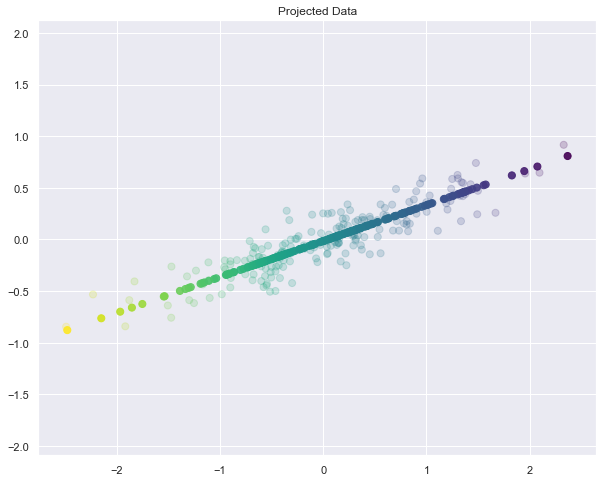

In [11]:
X_approx = pca.inverse_transform(X_proj)

plt.scatter(X[:, 0], X[:, 1], s=50, c=c, cmap='viridis', alpha=0.2)                # plot original data
plt.scatter(X_approx[:, 0], X_approx[:, 1], s=50, c=c, cmap='viridis', alpha=0.9)  # plot projected data
plt.title("Projected Data")
plt.axis('equal')
plt.show()

The light points are the original data, while the dark points are the projected version.  We see that after truncating 5% of the variance of this dataset and then reprojecting it, the "most important" features of the data are maintained, and we've compressed the data by 50%!

This is the sense in which "dimensionality reduction" works: if you can approximate a data set in a lower dimension, you can often have an easier time **visualizing** it or **fitting complicated models** to the data.

### Application of PCA to Digits for Visualization

The dimensionality reduction might seem a bit abstract in two dimensions, but the projection and dimensionality reduction can be extremely useful when visualizing high-dimensional data.

Let's take a quick look at the application of PCA to the digits data we looked at before:

<img src="http://www.snrazavi.ir/imgs/digits_2d.jpg" width="50%"/>

Load digits dataset:

In [12]:
from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target

Perform PCA to project data from 64 to 2 dimensions:

In [13]:
pca = PCA(n_components=2)  
X_proj = pca.fit_transform(X)  # project from 64 to 2 dimensions

print("Shape of original data:  {}".format(X.shape))
print("Shape of projected data: {}".format(X_proj.shape))

Shape of original data:  (1797, 64)
Shape of projected data: (1797, 2)


Plot projected data:

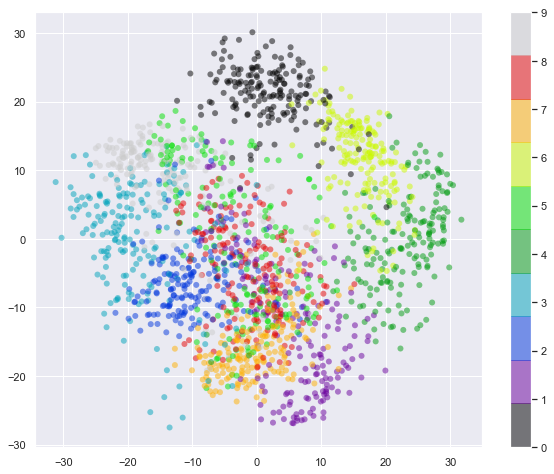

In [14]:
plt.scatter(X_proj[:, 0], X_proj[:, 1], 
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.show()

This gives us an idea of the relationship between the digits. Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits, **without reference** to the labels.

### What do the Components Mean?

PCA is a very useful dimensionality reduction algorithm, because it has a very intuitive interpretation via *eigenvectors*.
The input data is represented as a vector: in the case of the digits, our data is

$$
x = [x_1, x_2, x_3 \cdots]
$$

but what this really means is

$$
image(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots
$$

If we reduce the dimensionality in the pixel space to (say) 6, we recover only a partial image:

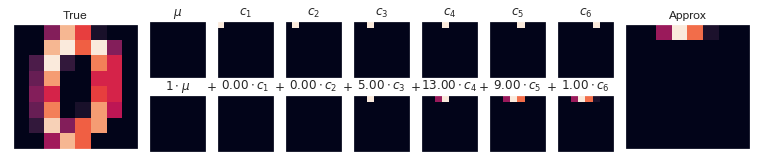

In [15]:
plot_image_components(digits.data[0])

But the pixel-wise representation is not the only choice. We can also use other *basis functions*, and write something like

$$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$

What PCA does is to choose optimal **basis functions** so that only a few are needed to get a reasonable approximation.
The low-dimensional representation of our data is the coefficients of this series, and the approximate reconstruction is the result of the sum:

In [16]:
plot_pca_interactive(digits.data)

interactive(children=(IntSlider(value=0, description='i', max=1796), Output()), _dom_classes=('widget-interact…

Here we see that with only six PCA components, we recover a reasonable approximation of the input!

Thus we see that PCA can be viewed from two angles. It can be viewed as **dimensionality reduction**, or it can be viewed as a form of **lossy data compression** where the loss favors noise. In this way, PCA can be used as a **filtering** process as well.

### Choosing the Number of Components

But how much information have we thrown away?  We can figure this out by looking at the **explained variance** as a function of the components:

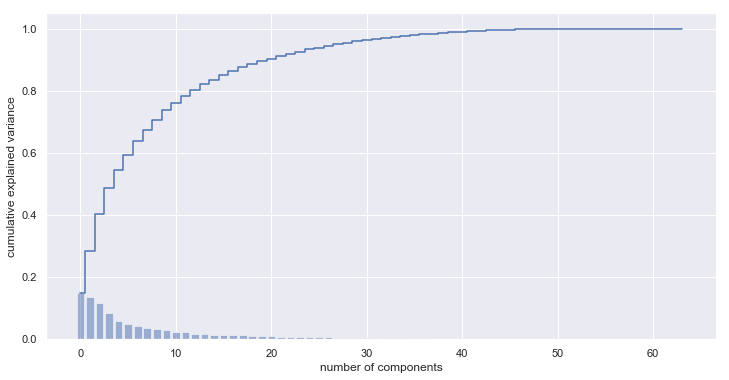

In [17]:
plt.figure(figsize=(12, 6))

pca = PCA().fit(X)  # Notice

plt.bar(range(len(pca.explained_variance_ratio_)),
        pca.explained_variance_ratio_,
        alpha=0.5,
        align='center')

plt.step(range(len(pca.explained_variance_ratio_)),
         np.cumsum(pca.explained_variance_ratio_),
         where='mid')

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [18]:
total_var = np.cumsum(pca.explained_variance_ratio_)

for i in [0, 1, 2, 3, 4, 5, 8, 12, 20, 27, 36, 40, 50]:
    print("Components: {:2d}, total explained variance: {:.2f}".format(i, total_var[i]))

Components:  0, total explained variance: 0.15
Components:  1, total explained variance: 0.29
Components:  2, total explained variance: 0.40
Components:  3, total explained variance: 0.49
Components:  4, total explained variance: 0.54
Components:  5, total explained variance: 0.59
Components:  8, total explained variance: 0.71
Components: 12, total explained variance: 0.80
Components: 20, total explained variance: 0.90
Components: 27, total explained variance: 0.95
Components: 36, total explained variance: 0.98
Components: 40, total explained variance: 0.99
Components: 50, total explained variance: 1.00


Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance.  Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

### SECOM Data

In [19]:
data = []
with open('data/secom.data') as f:
    for line in f:
        data.append([float(x) for x in line.split(' ')])

SECOM = np.array(data)
print(SECOM.shape)

(1567, 590)


In [20]:
df = pd.DataFrame(data=SECOM)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


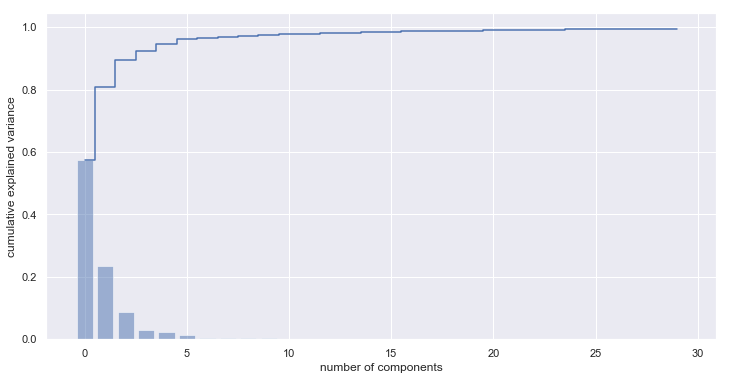

In [21]:
K = 30
plt.figure(figsize=(12, 6))

pca = PCA().fit(df.fillna(0))  # Notice

plt.bar(range(K),
        pca.explained_variance_ratio_[:K],
        alpha=0.5,
        align='center')

plt.step(range(K),
         np.cumsum(pca.explained_variance_ratio_[:K]),
         where='mid')

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [22]:
total_var = np.cumsum(pca.explained_variance_ratio_[:K])

for i in [0, 1, 2, 3, 4, 5, 10, 15, 20, 29]:
    print("Components: {:2d}, total explained variance: {:.2f}".format(i, total_var[i]))

Components:  0, total explained variance: 0.57
Components:  1, total explained variance: 0.81
Components:  2, total explained variance: 0.90
Components:  3, total explained variance: 0.92
Components:  4, total explained variance: 0.95
Components:  5, total explained variance: 0.96
Components: 10, total explained variance: 0.98
Components: 15, total explained variance: 0.99
Components: 20, total explained variance: 0.99
Components: 29, total explained variance: 1.00


### PCA as data compression

As we mentioned, PCA can be used for is a sort of data compression. Using a small ``n_components`` allows you to represent a high dimensional point as a sum of just a few principal vectors.

Here's what a single digit looks like as you change the number of components:

In [23]:
def update_pca_plot(i, n_components):
    pca = PCA(n_components).fit(X)
    im = pca.inverse_transform(pca.transform(X[i:i+1]))
    
    plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.imshow(im.reshape((8, 8)), cmap='binary')
    plt.title('Approximated Data (k={})'.format(n_components))
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(X[i].reshape((8, 8)), cmap='binary')
    plt.title('Original Data')
    plt.axis('off')
    plt.show()


idx = widgets.IntSlider(value=20, min=0, max=1796, desc='data')
interact(update_pca_plot, i=idx, n_components=range(1, 65));

interactive(children=(IntSlider(value=20, description='i', max=1796), Dropdown(description='n_components', opt…

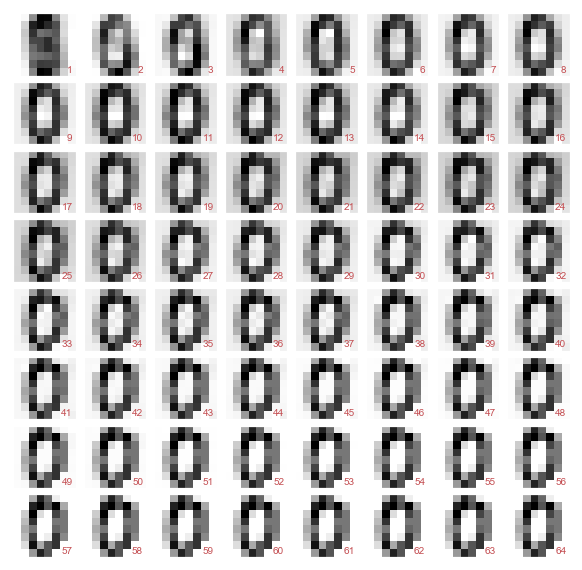

In [24]:
def show_all_digit_components(X, index=None):
    index = np.random.choice(X.shape[0]) if index is None else index
    
    fig, axes = plt.subplots(8, 8, figsize=(10, 10))
    fig.subplots_adjust(hspace=0.1, wspace=0.1)

    for i, ax in enumerate(axes.flat):
        pca = PCA(i + 1).fit(X)
        im = pca.inverse_transform(pca.transform(X[index:index+1]))

        ax.imshow(im.reshape((8, 8)), cmap='binary')
        ax.text(0.95, 0.05, '{0}'.format(i + 1), ha='right', transform=ax.transAxes, color='r')
        ax.set_xticks([])
        ax.set_yticks([])
        
    plt.show()
    

show_all_digit_components(X, 0)

Let's take another look at this by using IPython's ``interact`` functionality to view the reconstruction of several images at once:

### MNIST Dataset

In [25]:
import gzip, pickle

DATA_PATH = 'data/mnist.pkl.gz'

with gzip.open(DATA_PATH, 'rb') as f:
    (X, y), _, _ = pickle.load(f, encoding='latin1')

# As a sanity check, we print out the size of the data.
print('Training data shape:    ', X.shape)
print('Training labels shape:  ', y.shape)

Training data shape:     (50000, 784)
Training labels shape:   (50000,)


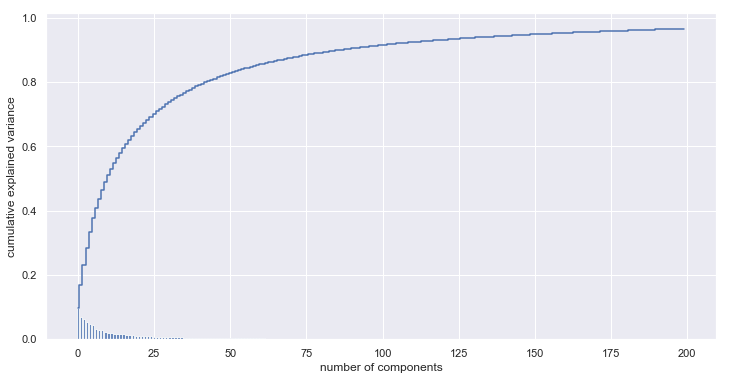

In [26]:
plt.figure(figsize=(12, 6))

pca = PCA().fit(X)  # Notice

plt.bar(range(200),
        pca.explained_variance_ratio_[:200],
        alpha=0.8,
        align='center')

plt.step(range(200),
         np.cumsum(pca.explained_variance_ratio_[:200]),
         where='mid')

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [27]:
def plot_digits(n_components):
    fig = plt.figure(figsize=(16, 8))
    nside = 10
    
    pca = PCA(n_components).fit(X)
    X_proj = pca.inverse_transform(pca.transform(X[:nside ** 2]))
    X_proj = np.reshape(X_proj, (nside, nside, 28, 28))
    total_var = pca.explained_variance_ratio_.sum()
    
    plt.subplot(121)
    im = np.vstack([np.hstack([X_proj[i, j] for j in range(nside)])
                    for i in range(nside)])
    plt.imshow(im, cmap='binary')
    plt.title("k = {0}, variance = {1:.2f}".format(n_components, total_var), size=18)
    plt.axis('off')
    plt.clim(0, 1)
    
    plt.subplot(122)
    X_org = X[:nside ** 2].reshape((nside, nside, 28, 28))
    im = np.vstack([np.hstack([X_org[i, j] for j in range(nside)]) for i in range(nside)])
    plt.imshow(im, cmap='binary')
    plt.title("Original Data", size=18)
    plt.axis('off')
    

interact(plot_digits, n_components=[10, 20, 30, 40, 50, 100, 150, 200, 784]);

interactive(children=(Dropdown(description='n_components', options=(10, 20, 30, 40, 50, 100, 150, 200, 784), v…

## Face Dataset

Load face dataset:

In [28]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()
X, y = faces['data'], faces['target']
print(X.shape)

(400, 4096)


Visualize face dataset:

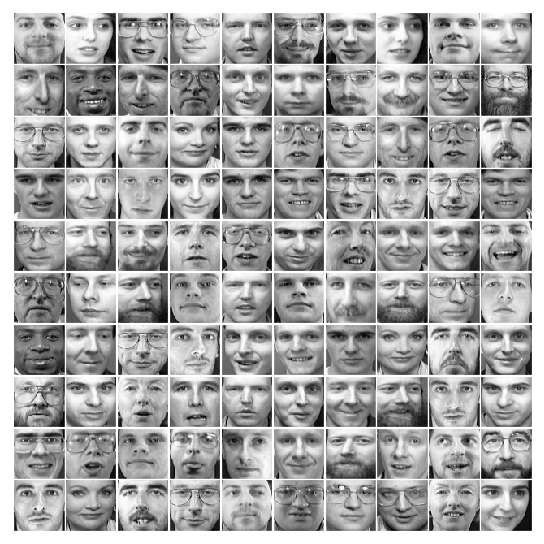

In [29]:
# select 100 faces randomly
X_samples = np.random.permutation(X)[:100]

fig, axes = plt.subplots(10, 10, figsize=(12, 12))
fig.subplots_adjust(left=0.2, bottom=0.2, right=0.8, top=0.8, hspace=0.01, wspace=0.01)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_samples[i].reshape((64, 64)), cmap='gray')
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

In [30]:
def update_pca_face_plot(i, n_components):
    pca = PCA(n_components).fit(X)
    im = pca.inverse_transform(pca.transform(X[i:i+1]))
    
    fig = plt.figure(figsize=(12, 6))
    plt.subplot(121)
    plt.imshow(im.reshape((64, 64)), cmap='gray')
    total_var = pca.explained_variance_ratio_.sum()
    plt.title('Approximated Data ({:.2f})'.format(total_var))
    plt.axis('off')

    plt.subplot(122)
    plt.imshow(X[i].reshape((64, 64)), cmap='gray')
    plt.title('Original Data')
    plt.axis('off')
    plt.show()


idx = widgets.IntSlider(value=32, min=0, max=400, desc='data')
widgets.interact(update_pca_face_plot, i=idx, n_components=[10, 50, 100, 150, 200, 300, 400]);

interactive(children=(IntSlider(value=32, description='i', max=400), Dropdown(description='n_components', opti…

In [31]:
nside=5
X_samples = np.random.permutation(X)[:nside ** 2]


def plot_faces(n_components):
    global X_samples
    
    fig = plt.figure(figsize=(12, 6))    
    pca = PCA(n_components).fit(X)
    X_proj = pca.inverse_transform(pca.transform(X_samples))
    X_proj = np.reshape(X_proj, (nside, nside, 64, 64))
    total_var = pca.explained_variance_ratio_.sum()
    
    
    plt.subplot(121)
    im = np.vstack([np.hstack([X_proj[i, j] for j in range(nside)]) for i in range(nside)])
    plt.imshow(im, cmap='gray')
    plt.axis('off')
    plt.title("k = {0}, variance = {1:.2f}".format(n_components, total_var), size=18)
    
    plt.subplot(122)
    X_org = np.reshape(X_samples, (nside, nside, 64, 64))
    im = np.vstack([np.hstack([X_org[i, j] for j in range(nside)]) for i in range(nside)])
    plt.imshow(im, cmap='gray')
    plt.axis('off')
    plt.title("Original Faces", size=18)
    

interact(plot_faces, n_components=[10, 20, 30, 40, 50, 100, 150, 200]);

interactive(children=(Dropdown(description='n_components', options=(10, 20, 30, 40, 50, 100, 150, 200), value=…

In [32]:
def plot_faces_components(size):
    n_components = size ** 2
    pca = PCA(n_components).fit(X)
    C = np.reshape(pca.components_[:n_components], (size, size, 64, 64))
    total_var = pca.explained_variance_ratio_.sum()
    
    
    im = np.vstack([np.hstack([C[i, j] for j in range(size)]) for i in range(size)])

    fig = plt.figure(figsize=(10, 10))
    plt.imshow(im, cmap='gray')
    plt.xticks(())
    plt.yticks(())
    plt.title("k = {0}, variance = {1:.2f}".format(n_components, total_var), size=18)
    plt.show()


size = widgets.IntSlider(value=5, min=1, max=64, step=1, desc='size')
interact(plot_faces_components, size=size);

interactive(children=(IntSlider(value=5, description='size', max=64, min=1), Output()), _dom_classes=('widget-…

In [33]:
def plot_faces_components(size, index):
    n_components = size ** 2
    pca = PCA(n_components).fit(X)
    C = np.reshape(pca.components_[:n_components], (size, size, 64, 64))
    total_var = pca.explained_variance_ratio_.sum()
    
    
    im = np.vstack([np.hstack([C[i, j] for j in range(size)]) for i in range(size)])
    
    x_proj = pca.transform(X[index:index+1])
    x_approx = pca.inverse_transform(x_proj) 
        
    fig = plt.figure(figsize=(18, 6))
    plt.subplot(131)
    plt.imshow(im, cmap='gray')
    plt.xticks(())
    plt.yticks(())
    plt.title("Principal Components".format(n_components, total_var), size=18)
    
    plt.subplot(132)
    plt.imshow(x_approx.reshape(64, 64), cmap='gray')
    plt.xticks(())
    plt.yticks(())
    plt.title("k = {0}, variance = {1:.2f}".format(n_components, total_var), size=18)
        
    plt.subplot(133)
    plt.imshow(X[index].reshape(64, 64), cmap='gray')
    plt.xticks(())
    plt.yticks(())
    plt.title("Original face", size=18)
    plt.show()

size = widgets.IntSlider(value=1, min=1, max=20, step=1, desc='size')
index = widgets.IntSlider(value=32, min=0, max=399, step=1, desc='index')
interact(plot_faces_components, size=size, index=index);

interactive(children=(IntSlider(value=1, description='size', max=20, min=1), IntSlider(value=32, description='…

## PCA Implementation

In [34]:
from numpy.linalg import svd
np.set_printoptions(precision=2)

In [35]:
def PCA(X, k=2):
    """ Principal Component Analysis implementation
    
    Arguments:
        - X: data matrix - numpy array of shape (m, n)
        - k: number of components
        
    Returns:
       - Projection of X into a k-d space of principal components
    
    """
    m = X.shape[0]
    
    Xn = X - X.mean(axis=0)   # STEP 1: zero-center data (remove mean)          
    Sigma = (Xn.T @ Xn) / m   # STEP 2: compute covariance matrix
    U, S, VT = svd(Sigma)     # STEP 3: Singular Value Decomposition
    
    X_proj = Xn @ U[:, :k]    # project data
    return X_proj

In [36]:
X = np.array([[1, 1, 1, 0, 0], 
              [2, 2, 2, 0, 0], 
              [1, 1, 1, 0, 0], 
              [5, 5, 5, 0, 0], 
              [1, 1, 0, 2, 2], 
              [0, 0, 0, 3, 3], 
              [0, 0, 0, 1, 1]], dtype=np.float32)
print(X)

[[1. 1. 1. 0. 0.]
 [2. 2. 2. 0. 0.]
 [1. 1. 1. 0. 0.]
 [5. 5. 5. 0. 0.]
 [1. 1. 0. 2. 2.]
 [0. 0. 0. 3. 3.]
 [0. 0. 0. 1. 1.]]


In [37]:
X_proj = PCA(X, k=3)
print(X_proj)

[[ 0.17  1.37 -0.01]
 [-1.44  0.74 -0.02]
 [ 0.17  1.37 -0.01]
 [-6.28 -1.17 -0.06]
 [ 1.76 -1.1   0.57]
 [ 3.33 -1.92 -0.35]
 [ 2.3   0.7  -0.11]]


#### STEP 1: Zero-center data

In [38]:
mu = np.mean(X, axis=0)
X_norm = X - mu
print(X_norm)

[[-0.43 -0.43 -0.29 -0.86 -0.86]
 [ 0.57  0.57  0.71 -0.86 -0.86]
 [-0.43 -0.43 -0.29 -0.86 -0.86]
 [ 3.57  3.57  3.71 -0.86 -0.86]
 [-0.43 -0.43 -1.29  1.14  1.14]
 [-1.43 -1.43 -1.29  2.14  2.14]
 [-1.43 -1.43 -1.29  0.14  0.14]]


#### STEP 2: Compute covariance matrix

In [39]:
m = X.shape[0]
Sigma = (X_norm.T @ X_norm) / m

#### STEP 3: Singular Value Decomposition

In [40]:
U, S, V = svd(Sigma)

In [41]:
print(U)

[[-5.27e-01 -2.45e-01  4.02e-01 -7.07e-01 -7.03e-17]
 [-5.27e-01 -2.45e-01  4.02e-01  7.07e-01  3.88e-17]
 [-5.56e-01 -1.46e-01 -8.18e-01  6.91e-15 -7.46e-19]
 [ 2.59e-01 -6.55e-01 -5.94e-02  6.75e-16 -7.07e-01]
 [ 2.59e-01 -6.55e-01 -5.94e-02  5.64e-16  7.07e-01]]


In [42]:
print(S)

[8.72e+00 1.58e+00 6.69e-02 2.24e-16 0.00e+00]


Project data:

In [43]:
X_proj = X_norm @ U[:, :3]

print(X_proj)

[[ 0.17  1.37 -0.01]
 [-1.44  0.74 -0.02]
 [ 0.17  1.37 -0.01]
 [-6.28 -1.17 -0.06]
 [ 1.76 -1.1   0.57]
 [ 3.33 -1.92 -0.35]
 [ 2.3   0.7  -0.11]]


Recover data:

In [44]:
X_approx = X_proj @ U[:, :3].T + mu

print(X_approx)

[[ 1.00e+00  1.00e+00  1.00e+00 -5.96e-08 -5.96e-08]
 [ 2.00e+00  2.00e+00  2.00e+00 -5.96e-08 -5.96e-08]
 [ 1.00e+00  1.00e+00  1.00e+00 -5.96e-08 -5.96e-08]
 [ 5.00e+00  5.00e+00  5.00e+00 -5.96e-08 -5.96e-08]
 [ 1.00e+00  1.00e+00 -1.19e-07  2.00e+00  2.00e+00]
 [ 1.19e-07  1.19e-07  0.00e+00  3.00e+00  3.00e+00]
 [ 1.19e-07  1.19e-07  1.19e-07  1.00e+00  1.00e+00]]


In [45]:
print(X)

[[1. 1. 1. 0. 0.]
 [2. 2. 2. 0. 0.]
 [1. 1. 1. 0. 0.]
 [5. 5. 5. 0. 0.]
 [1. 1. 0. 2. 2.]
 [0. 0. 0. 3. 3.]
 [0. 0. 0. 1. 1.]]


Choosing number of principal components:

In [46]:
m, n = X.shape

Xn = X - X.mean(axis=0)
Sigma = (Xn.T @ Xn) / m
U, S, V = svd(Sigma)

for k in range(1, n + 1):
    total_var = np.sum(S[:k]) / np.sum(S)
    print("k = {:d}, explained variance = {:.3f}".format(k, total_var))
    if total_var >= 0.99: break

k = 1, explained variance = 0.841
k = 2, explained variance = 0.994


## Appendix: Singular Value Decomposition

In [47]:
X = np.array([[1, 1, 1, 0, 0], 
              [2, 2, 2, 0, 0], 
              [1, 1, 1, 0, 0], 
              [5, 5, 5, 0, 0], 
              [1, 1, 0, 2, 2], 
              [0, 0, 0, 3, 3], 
              [0, 0, 0, 1, 1]], dtype=np.float32)

In [48]:
U, Sigma, VT = svd(X)

In [49]:
print(Sigma)

[9.72e+00 5.29e+00 6.84e-01 4.12e-16 1.36e-16]


In [50]:
np.diag(Sigma)

array([[9.72e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 5.29e+00, 0.00e+00, 0.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 6.84e-01, 0.00e+00, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, 4.12e-16, 0.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 1.36e-16]], dtype=float32)

In [51]:
print(U.shape, VT.shape)

(7, 7) (5, 5)


In [52]:
X_approx = U[:, :1] @ np.diag(Sigma)[:1, :1] @ VT[:1, :]

print("SSE = {:.2f}".format(np.linalg.norm(X - X_approx) ** 2))
print(X_approx)

SSE = 28.49
[[1.01e+00 1.01e+00 9.82e-01 6.05e-02 6.05e-02]
 [2.01e+00 2.01e+00 1.96e+00 1.21e-01 1.21e-01]
 [1.01e+00 1.01e+00 9.82e-01 6.05e-02 6.05e-02]
 [5.03e+00 5.03e+00 4.91e+00 3.02e-01 3.02e-01]
 [7.57e-01 7.57e-01 7.39e-01 4.55e-02 4.55e-02]
 [1.22e-01 1.22e-01 1.19e-01 7.33e-03 7.33e-03]
 [4.06e-02 4.06e-02 3.97e-02 2.44e-03 2.44e-03]]


In [53]:
X_approx = U[:, :2] @ np.diag(Sigma)[:2, :2] @ VT[:2, :]

print("SSE = {:.2f}".format(np.linalg.norm(X - X_approx) ** 2))
print(X_approx)

SSE = 0.47
[[ 1.00e+00  1.00e+00  9.90e-01 -7.23e-04 -7.23e-04]
 [ 2.01e+00  2.01e+00  1.98e+00 -1.45e-03 -1.45e-03]
 [ 1.00e+00  1.00e+00  9.90e-01 -7.23e-04 -7.23e-04]
 [ 5.02e+00  5.02e+00  4.95e+00 -3.61e-03 -3.61e-03]
 [ 7.70e-01  7.70e-01  4.67e-01  2.03e+00  2.03e+00]
 [ 1.41e-01  1.41e-01 -2.87e-01  2.98e+00  2.98e+00]
 [ 4.71e-02  4.71e-02 -9.57e-02  9.93e-01  9.93e-01]]


In [54]:
X_approx = U[:, :3] @ np.diag(Sigma)[:3, :3] @ VT[:3, :]

print("SSE = {}".format(np.linalg.norm(X - X_approx) ** 2))
print(X_approx)

SSE = 5.132077777570264e-13
[[ 1.00e+00  1.00e+00  1.00e+00  3.50e-09  3.50e-09]
 [ 2.00e+00  2.00e+00  2.00e+00  6.99e-09  6.99e-09]
 [ 1.00e+00  1.00e+00  1.00e+00  3.50e-09  3.50e-09]
 [ 5.00e+00  5.00e+00  5.00e+00 -1.22e-08 -1.22e-08]
 [ 1.00e+00  1.00e+00  3.83e-09  2.00e+00  2.00e+00]
 [ 2.13e-08  2.13e-08  1.09e-09  3.00e+00  3.00e+00]
 [ 3.73e-09  3.73e-09 -1.49e-08  1.00e+00  1.00e+00]]
